# Experiments with model architecture
Different architectures of the model by varying it's length (number of neurons) and breadth (number of layers) are explored.

In [1]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.utils as model_utils
import km3net.model.eval as model_eval
import km3net.data.utils as data_utils
import km3net.model.data.pm as data_pm
from km3net.model.mlp import MLP
from torch.nn import BCELoss
from torch.optim import SGD, Adam
import torch
import pandas as pd

## Experiment 1
Increase height (neurons) of network.

+ Data: 50% of slice 615 (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 16) -> (16, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: 10

### Remarks
Consistently gave higher scores than previous best, this is the new best.

train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.026, valid loss: 0.012
epochs: 1, train loss: 0.011, valid loss: 0.010
epochs: 2, train loss: 0.009, valid loss: 0.011
epochs: 3, train loss: 0.009, valid loss: 0.009
epochs: 4, train loss: 0.009, valid loss: 0.009
epochs: 5, train loss: 0.009, valid loss: 0.008
epochs: 6, train loss: 0.009, valid loss: 0.009
epochs: 7, train loss: 0.009, valid loss: 0.009
epochs: 8, train loss: 0.009, valid loss: 0.008
epochs: 9, train loss: 0.008, valid loss: 0.008
---


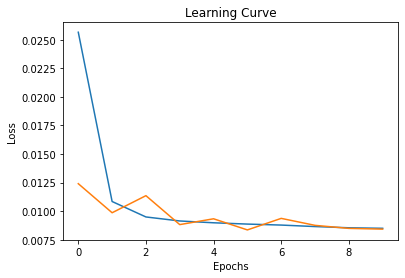

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


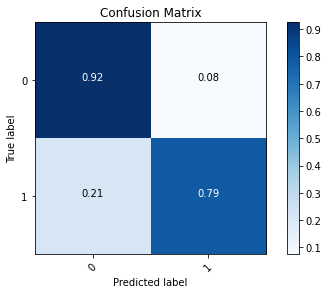

<Figure size 576x576 with 0 Axes>

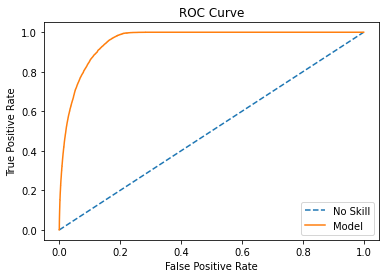

<Figure size 576x576 with 0 Axes>

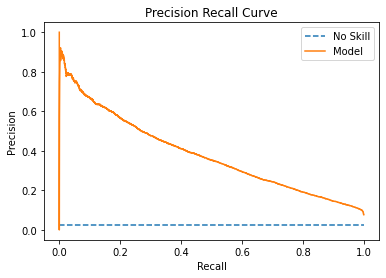

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    355859
         1.0       0.20      0.79      0.32      8372

    accuracy                           0.92    364231
   macro avg       0.60      0.86      0.64    364231
weighted avg       0.98      0.92      0.94    364231

ROC AUC: 0.957
Precision Recall AUC: 0.382
F1 Score: 0.316
F2 Score: 0.494


In [2]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 1.1
+ Data: 50% of slice 615 (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 32) -> (32, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: ??

### Remarks
Similar results to previous best.



train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.035, valid loss: 0.017
epochs: 1, train loss: 0.012, valid loss: 0.009
epochs: 2, train loss: 0.009, valid loss: 0.008
---


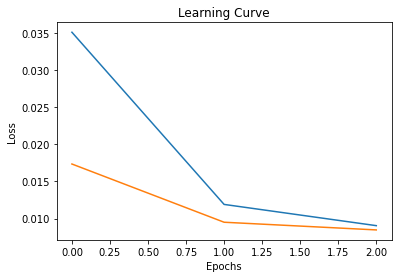

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


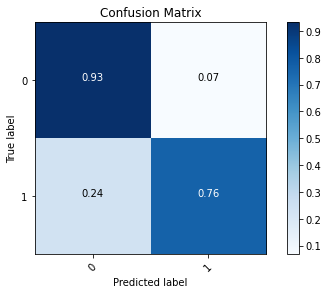

<Figure size 576x576 with 0 Axes>

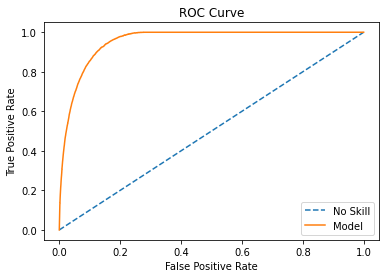

<Figure size 576x576 with 0 Axes>

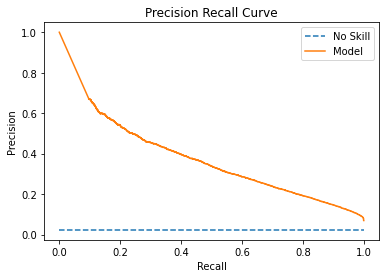

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    355859
         1.0       0.21      0.76      0.33      8372

    accuracy                           0.93    364231
   macro avg       0.60      0.85      0.65    364231
weighted avg       0.98      0.93      0.95    364231

ROC AUC: 0.955
Precision Recall AUC: 0.379
F1 Score: 0.328
F2 Score: 0.499


In [3]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 3,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 2
Increase depth (layers) of network.

+ Data: 50% of slice 615 (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 128) -> (128, 64) -> (64, 32) -> (32, 16) -> (16, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: 10


train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.013, valid loss: 0.008
epochs: 1, train loss: 0.008, valid loss: 0.008
epochs: 2, train loss: 0.008, valid loss: 0.008
epochs: 3, train loss: 0.008, valid loss: 0.007
epochs: 4, train loss: 0.007, valid loss: 0.007
epochs: 5, train loss: 0.007, valid loss: 0.007
epochs: 6, train loss: 0.007, valid loss: 0.007
epochs: 7, train loss: 0.007, valid loss: 0.007
epochs: 8, train loss: 0.007, valid loss: 0.006
epochs: 9, train loss: 0.007, valid loss: 0.007
---


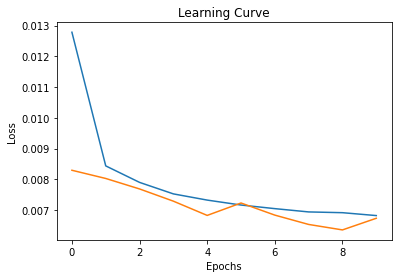

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


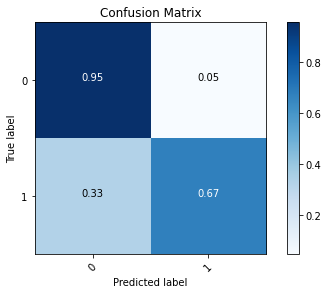

<Figure size 576x576 with 0 Axes>

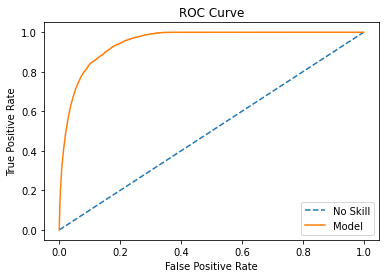

<Figure size 576x576 with 0 Axes>

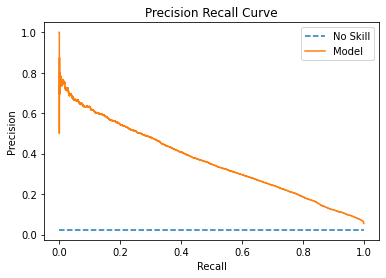

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    355859
         1.0       0.26      0.67      0.37      8372

    accuracy                           0.95    364231
   macro avg       0.62      0.81      0.67    364231
weighted avg       0.98      0.95      0.96    364231

ROC AUC: 0.950
Precision Recall AUC: 0.365
F1 Score: 0.373
F2 Score: 0.509


In [3]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)